In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#202331016_Nanda Revan Saputro

In [17]:
image = cv2.imread('tulisan7.jpg')

# Mengubah citra ke format RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Fungsi untuk Menghitung dan Menampilkan Histogram

In [18]:
# Fungsi untuk menghitung histogram dan menampilkan gambar dan histogram
def plot_image_and_histogram(image, title):
    # Menghitung histogram untuk masing-masing channel (Red, Green, Blue)
    color = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))
    
    # Gambar
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    
    # Histogram
    plt.subplot(1, 2, 2)
    for i, col in enumerate(color):
        # Hitung histogram untuk setiap channel warna
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(f"Histogram for {title}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Fungsi untuk menerapkan thresholding berdasarkan kategori warna
def threshold_color(image_rgb, lower, upper):
    # Membuat mask untuk warna tertentu
    lower_bound = np.array(lower)
    upper_bound = np.array(upper)
    mask = cv2.inRange(image_rgb, lower_bound, upper_bound)
    
    # Menghasilkan gambar setelah thresholding
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    return result

## Kategori: None (Tanpa Ambang Batas)

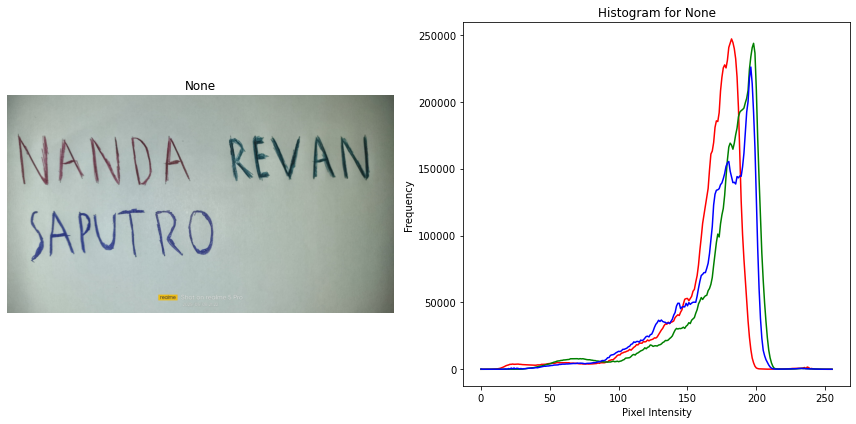

In [19]:
# Kategori 1: None - Tidak ada ambang batas
result_none = image_rgb

# Menampilkan gambar dan histogram untuk kategori None
plot_image_and_histogram(result_none, 'None')


## Kategori: Blue (Ambang Batas untuk Komponen Biru)

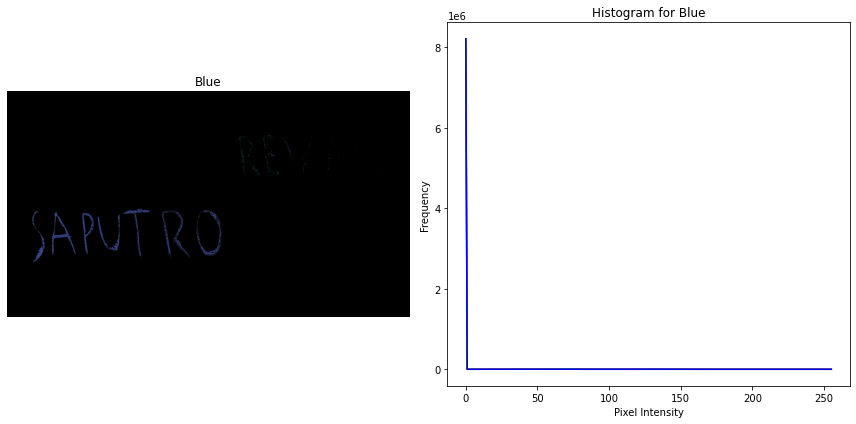

In [20]:
# Kategori 2: Blue - Ambang batas untuk komponen biru
result_blue = threshold_color(image_rgb, [0, 50, 80], [80, 80, 255])

# Menampilkan gambar dan histogram untuk kategori Blue
plot_image_and_histogram(result_blue, 'Blue')


## Kategori: Red Blue (Ambang Batas untuk Kombinasi Merah dan Biru)

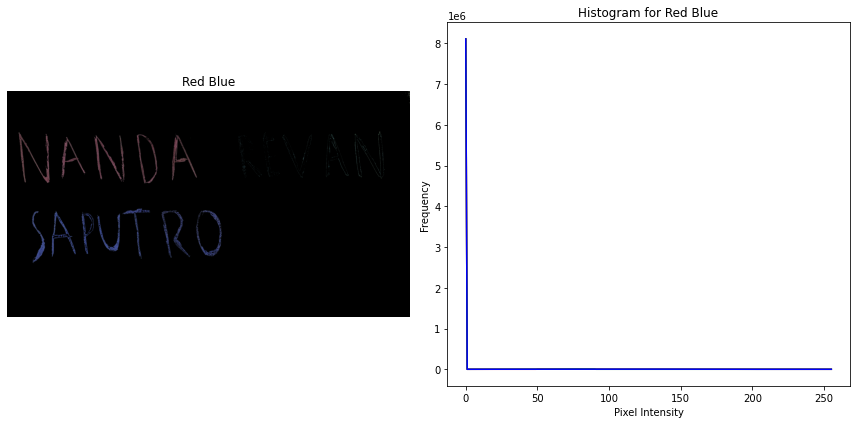

In [21]:
# Kategori 3: Red Blue - Ambang batas untuk kombinasi merah dan biru
# Perluasan ambang batas agar baik merah maupun biru terlihat jelas
result_red_blue = threshold_color(image_rgb, [50, 0, 50], [255,90, 200])

# Menampilkan gambar dan histogram untuk kategori Red Blue
plot_image_and_histogram(result_red_blue, 'Red Blue')


##  Kategori: Red Green Blue (Ambang Batas untuk Semua Komponen Warna RGB)

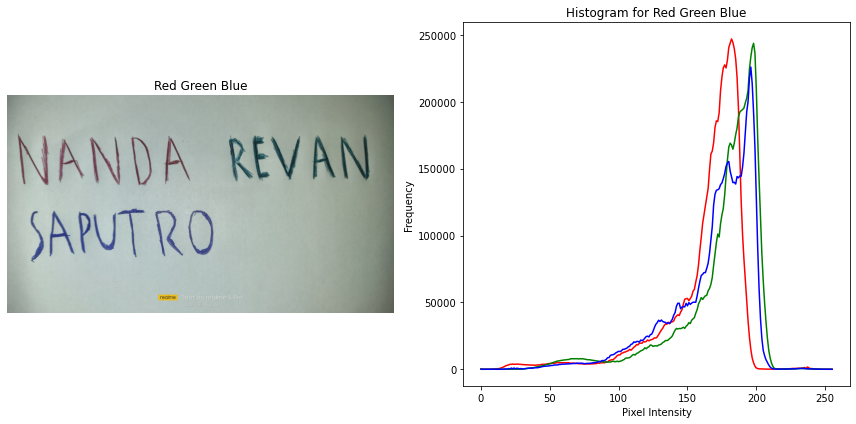

In [22]:
# Kategori 4: Red Green Blue - Ambang batas untuk semua komponen warna RGB
result_rgb = threshold_color(image_rgb, [0, 0, 0], [255, 255, 255])

# Menampilkan gambar dan histogram untuk kategori Red Gre|en Blue
plot_image_and_histogram(result_rgb, 'Red Green Blue')


## Menampilkan Semua Kategori dalam Satu Tampilan

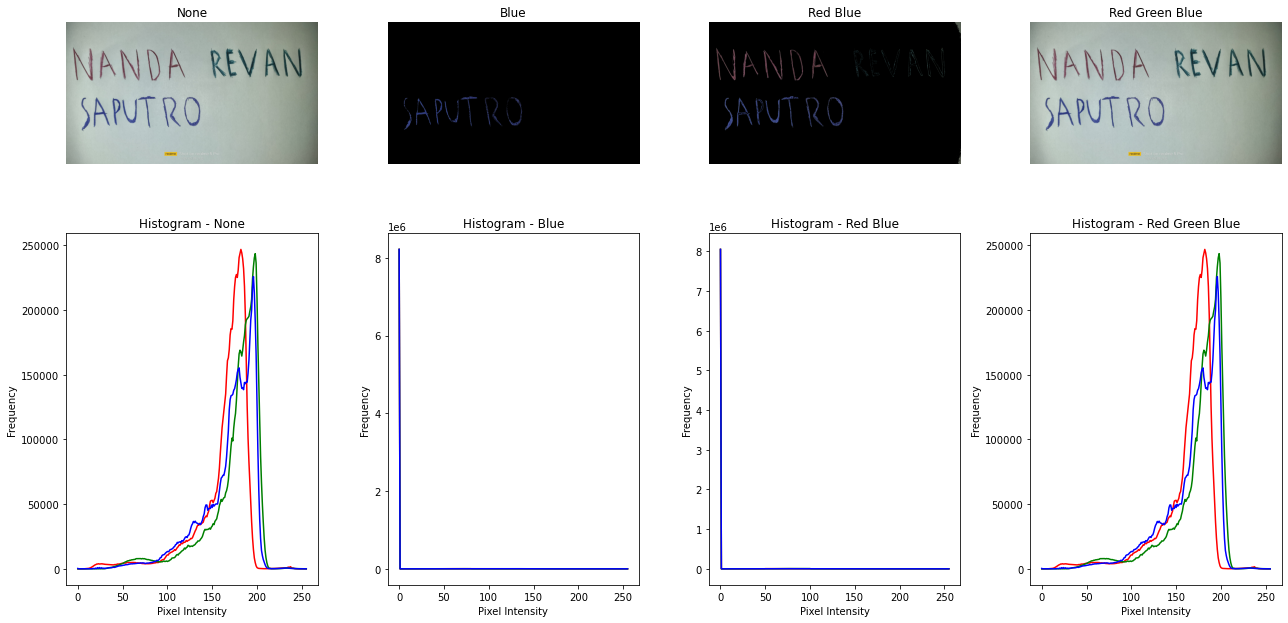

In [23]:
# Fungsi untuk menerapkan thresholding berdasarkan kategori warna
def threshold_color(image_rgb, lower, upper):
    # Membuat mask untuk warna tertentu
    lower_bound = np.array(lower)
    upper_bound = np.array(upper)
    mask = cv2.inRange(image_rgb, lower_bound, upper_bound)
    
    # Menghasilkan gambar setelah thresholding
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    return result

# Kategori 1: None - Tidak ada ambang batas
result_none = image_rgb

# Kategori 2: Blue - Ambang batas untuk komponen biru
result_blue = threshold_color(image_rgb, [0, 0, 100], [80, 80, 255])

# Kategori 3: Red Blue - Ambang batas untuk kombinasi merah dan biru
result_red_blue = threshold_color(image_rgb, [50, 0, 50], [255, 100, 255])

# Kategori 4: Red Green Blue - Ambang batas untuk semua komponen warna RGB
result_rgb = threshold_color(image_rgb, [0, 0, 0], [255, 255, 255])

# Menampilkan hasil untuk setiap kategori dalam satu tampilan grid
fig, ax = plt.subplots(2, 4, figsize=(18, 10))

# Menampilkan gambar dan histogram untuk kategori None
ax[0, 0].imshow(result_none)
ax[0, 0].set_title('None')
ax[0, 0].axis('off')

# Menampilkan histogram untuk kategori None
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist = cv2.calcHist([result_none], [i], None, [256], [0, 256])
    ax[1, 0].plot(hist, color=col)
ax[1, 0].set_title("Histogram - None")
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Menampilkan gambar dan histogram untuk kategori Blue
ax[0, 1].imshow(result_blue)
ax[0, 1].set_title('Blue')
ax[0, 1].axis('off')

# Menampilkan histogram untuk kategori Blue
for i, col in enumerate(color):
    hist = cv2.calcHist([result_blue], [i], None, [256], [0, 256])
    ax[1, 1].plot(hist, color=col)
ax[1, 1].set_title("Histogram - Blue")
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

# Menampilkan gambar dan histogram untuk kategori Red Blue
ax[0, 2].imshow(result_red_blue)
ax[0, 2].set_title('Red Blue')
ax[0, 2].axis('off')

# Menampilkan histogram untuk kategori Red Blue
for i, col in enumerate(color):
    hist = cv2.calcHist([result_red_blue], [i], None, [256], [0, 256])
    ax[1, 2].plot(hist, color=col)
ax[1, 2].set_title("Histogram - Red Blue")
ax[1, 2].set_xlabel('Pixel Intensity')
ax[1, 2].set_ylabel('Frequency')

# Menampilkan gambar dan histogram untuk kategori Red Green Blue
ax[0, 3].imshow(result_rgb)
ax[0, 3].set_title('Red Green Blue')
ax[0, 3].axis('off')

# Menampilkan histogram untuk kategori Red Green Blue
for i, col in enumerate(color):
    hist = cv2.calcHist([result_rgb], [i], None, [256], [0, 256])
    ax[1, 3].plot(hist, color=col)
ax[1, 3].set_title("Histogram - Red Green Blue")
ax[1, 3].set_xlabel('Pixel Intensity')
ax[1, 3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()